<a href="https://colab.research.google.com/github/KFurudate/Midoribon/blob/main/chap6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第6章 GLMの応用範囲をひろげる -ロジスティック回帰など-


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [3]:
data_dir = "/content/drive/My Drive/Midoribon/input/"
data =  pd.read_csv(os.path.join(data_dir, 'chap6a_data.csv'))

In [4]:
print(len(data))
data.head()

100


,N,y,x,f
0,8,1,9.76,C
1,8,6,10.48,C
2,8,5,10.83,C
3,8,6,10.94,C
4,8,1,9.37,C


In [5]:
data.describe()

,N,y,x
count,100.0,100.000000,100.000000
mean,8.0,5.080000,9.967200
std,0.0,2.743882,1.088954
min,8.0,0.000000,7.660000
25%,8.0,3.000000,9.337500
50%,8.0,6.000000,9.965000
75%,8.0,8.000000,10.770000
max,8.0,8.000000,12.440000


In [6]:
print(data.f)

0     C
1     C
2     C
3     C
4     C
     ..
95    T
96    T
97    T
98    T
99    T
Name: f, Length: 100, dtype: object


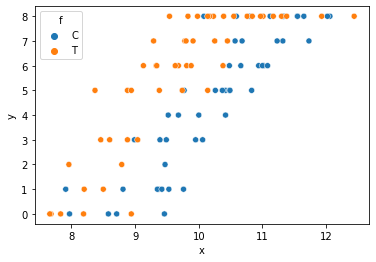

In [7]:
sns.scatterplot(x='x', y='y', hue='f', data=data)
plt.show()

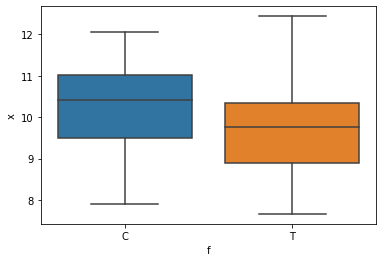

In [9]:
sns.boxplot(x='f', y='x', data=data)
plt.show()

### 二項分布で表現する「あり・なし」カウントデータ

二項分布とは、結果が2値であるベルヌーイの施行を独立にn回行った（上限がある）ときの確率変数をあらわす離散確率分布。


*Pr(y | N, q)* はN個の観察データ中、y個で事象が起こる確率


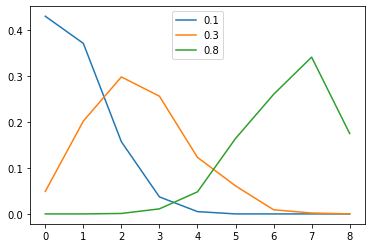

In [18]:
p_dicts =dict()
for q in (0.1, 0.3, 0.8):
    p_dict = dict()
    for i in range(0, 9):
        p_dict.update({i:0})
    for _ in range(1000):
        rnd = np.random.binomial(8,p=q)
        p_dict[rnd] += 1
    
    for i in range(0, 9):
        p_dict[i] /= 1000
        
    p_dicts.update({q: p_dict})

for param,dictionary in p_dicts.items():
    plt.plot(list(dictionary.keys()), list(dictionary.values()), label=str(param))
    
plt.legend()
plt.show()